# Libraries

In [1]:
# Disable all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Load the Data

In [3]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.drop('CustomerID', axis = 1, inplace = True)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Look at The Data

In [5]:
# Take a look at the form (shape) of the data (Dimensions of Dataset).
data.shape

(200, 4)

In [6]:
# Look at the columns names.
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [7]:
# Let's check the data, to see if there is duplicate data or not
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [8]:
# We are looking for duplicate rows.
data.duplicated().sum()

0

In [9]:
# Checking for missing values
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Use the .info() method to find out how many entries there are.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [11]:
data['Gender']=data['Gender'].astype('category')

In [12]:
# We are looking for types of the columns in the data.
data.dtypes

Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [13]:
# To know and see the number of components or the number of sample of each column in this data.
data.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

# Data Visualization

In [14]:
df = data.copy()
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [15]:
# Matrix form for correlation data
drrr= df.corr()
drrr

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

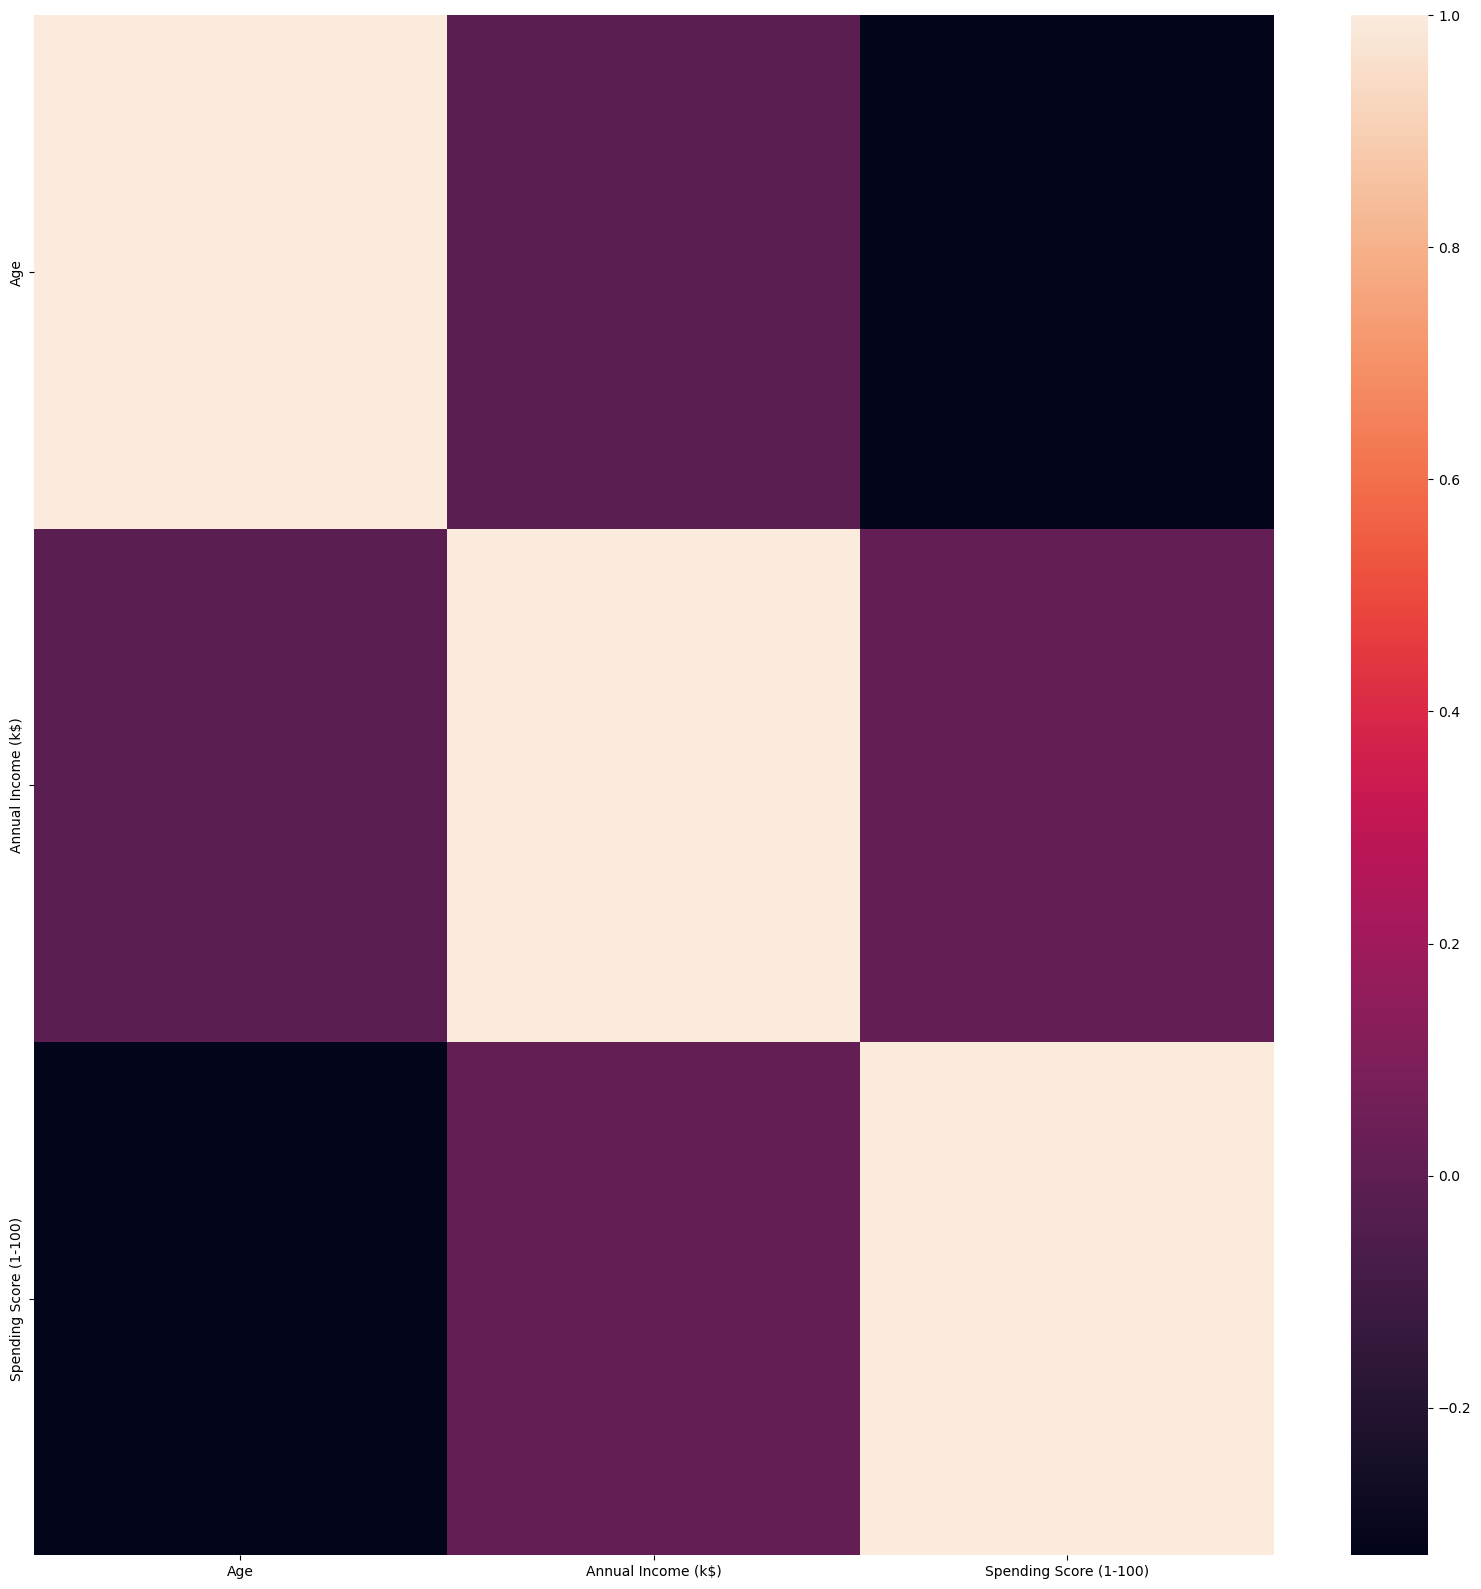

In [16]:
# We here looking at the data Visualization by heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(drrr)

<Axes: >

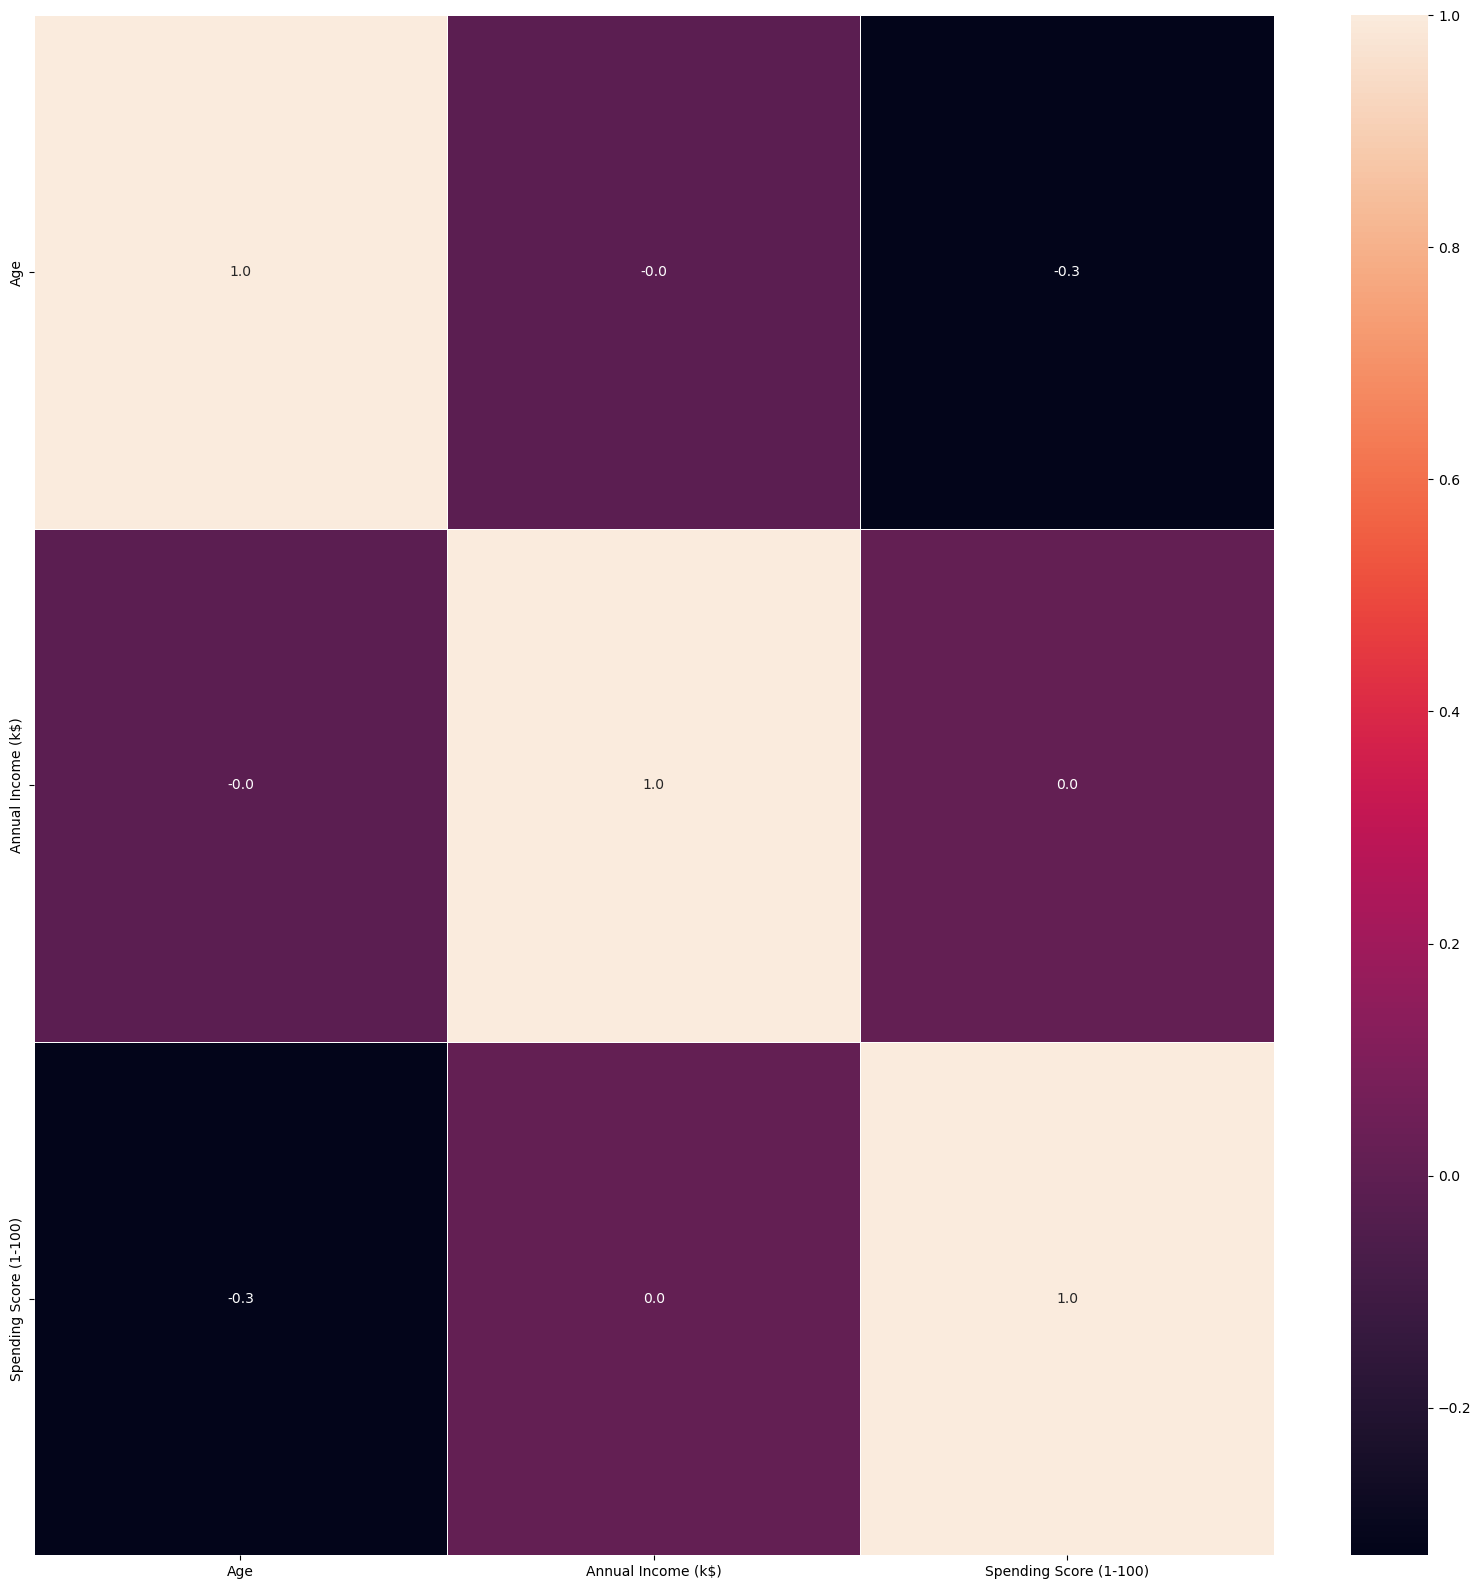

In [17]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(drrr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

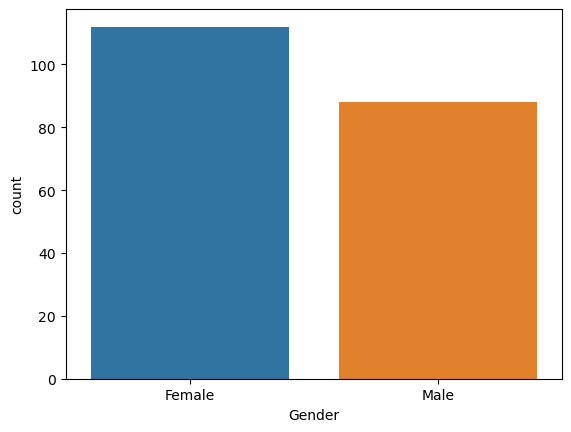

<Figure size 2000x2000 with 0 Axes>

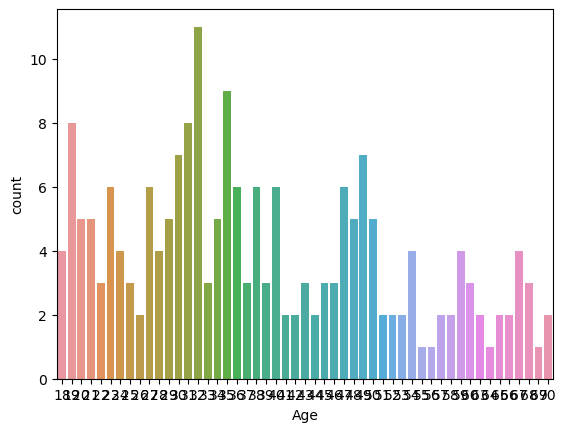

<Figure size 2000x2000 with 0 Axes>

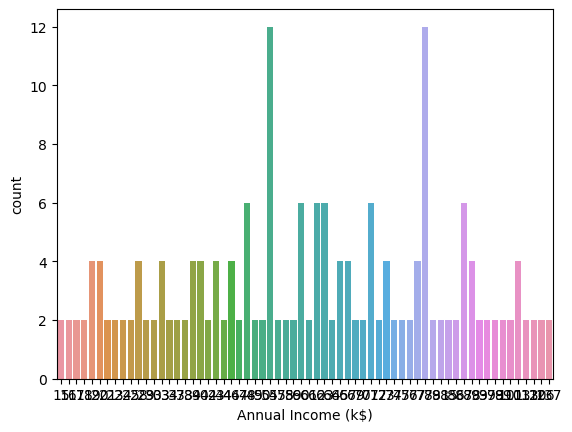

<Figure size 2000x2000 with 0 Axes>

In [18]:
# Original data.
for i in df.loc[:, ~df.columns.isin(["Genre", "Spending Score (1-100)"])]:
    f = sns.countplot(x=df[i]);
    plt.figure(figsize=(20,20))
    plt.show()

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

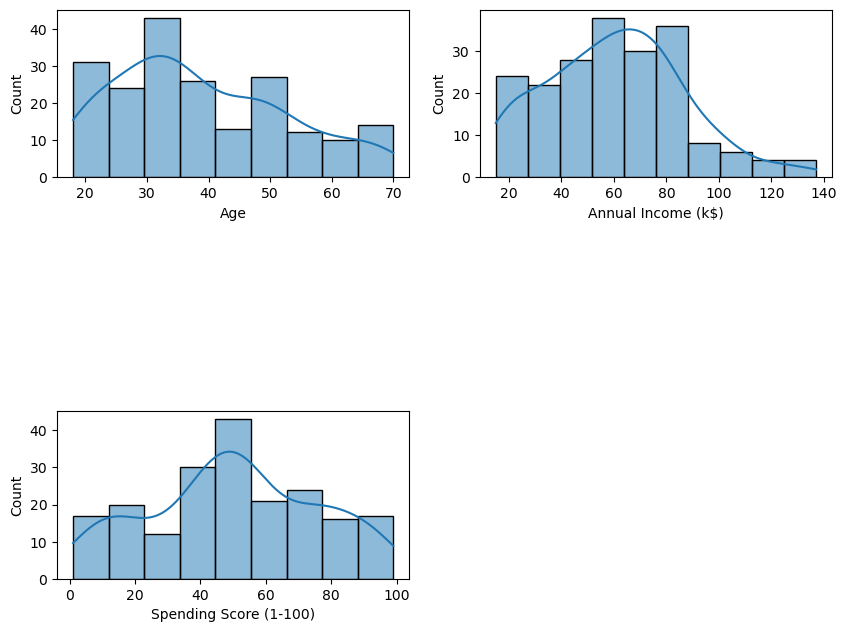

In [19]:
plt.figure(figsize = (10,10))

plt.subplot(4,2,1)
sns.histplot(data=df['Age'], x=df['Age'], kde=True)

plt.subplot(4,2,2)
sns.histplot(data=df['Annual Income (k$)'], x=df['Annual Income (k$)'], kde=True)

plt.subplot(4,2,5)
sns.histplot(data=df['Spending Score (1-100)'], x=df['Spending Score (1-100)'], kde=True)

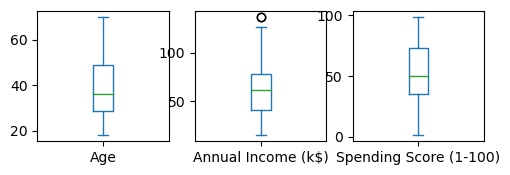

In [20]:
df.plot(kind='box',subplots=True,layout=(10,10),figsize=(20,20))
plt.show()

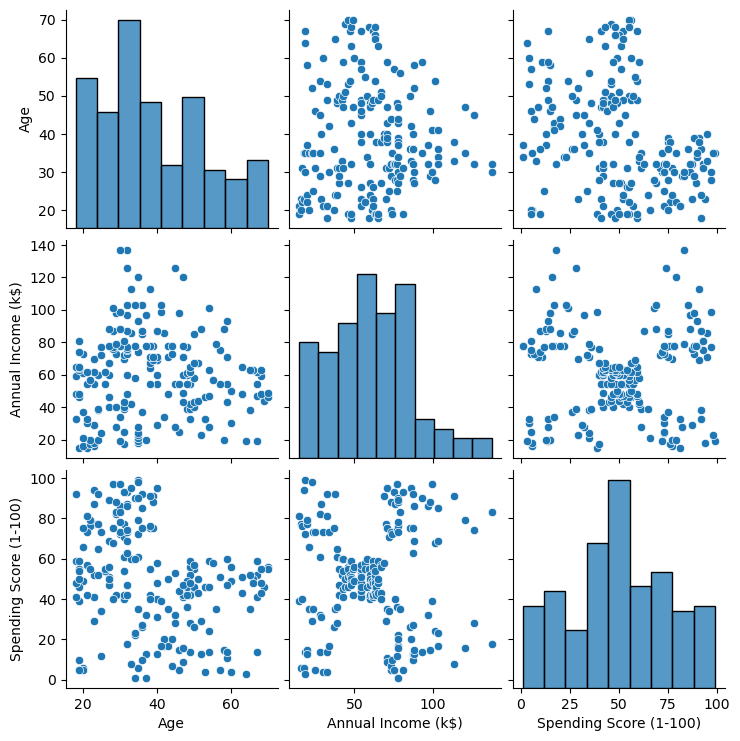

In [21]:
sns.pairplot(df)

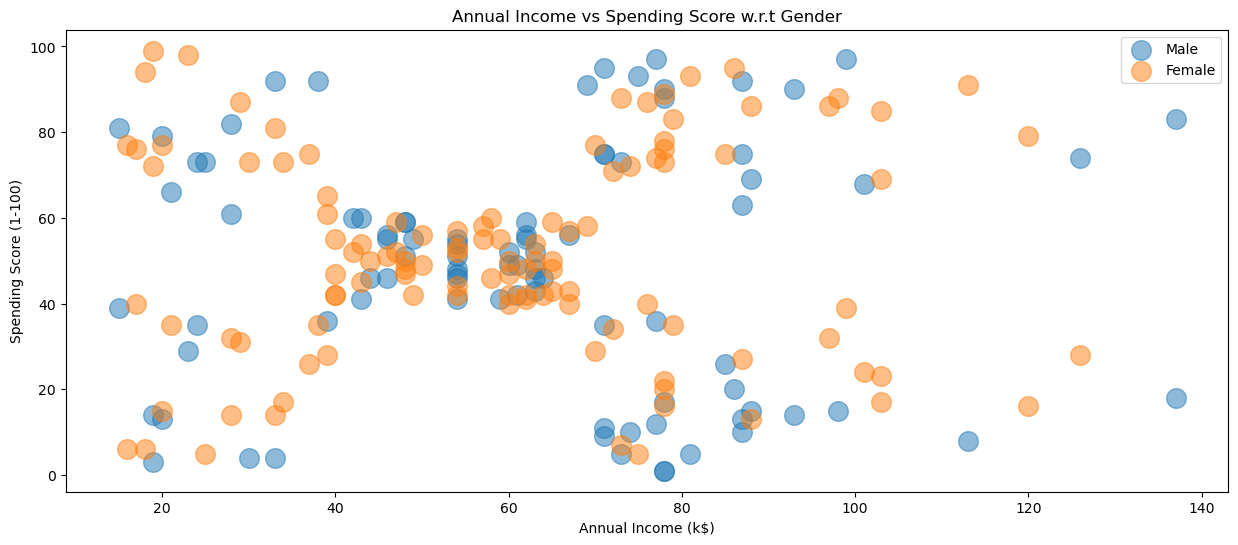

In [22]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

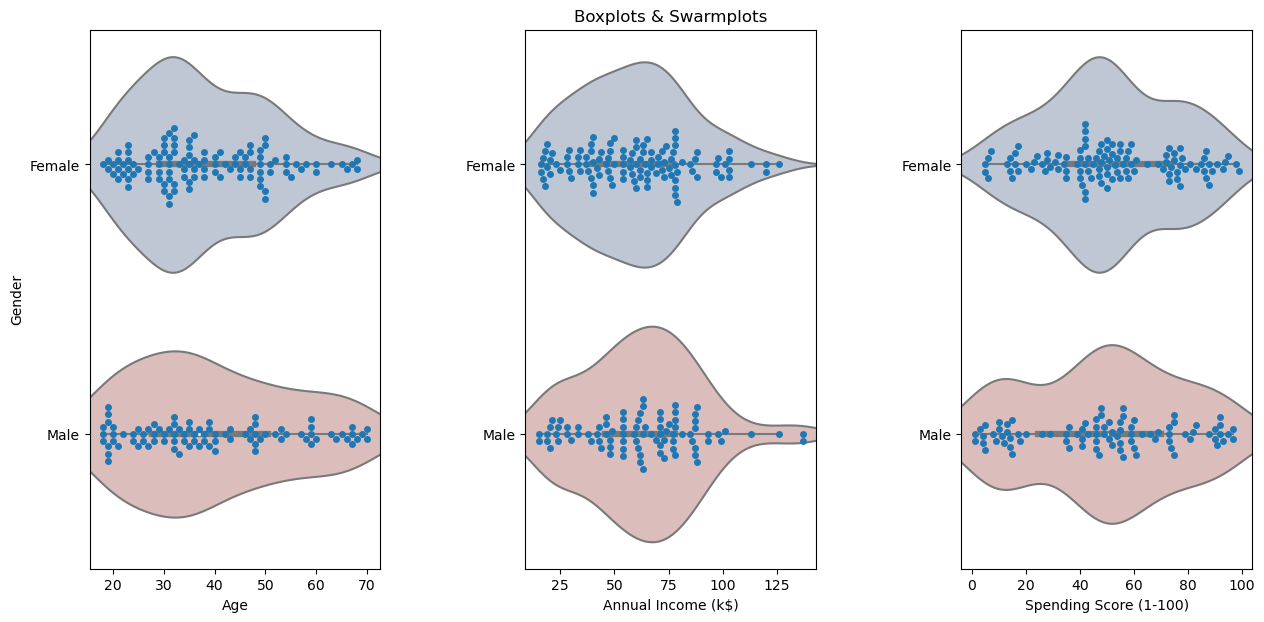

In [23]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# Define dependant & independant

In [24]:
X=data.drop(['Gender'],axis=1)
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Model

## k-means clustering

In [25]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)

In [26]:
y=kmeans.fit_predict(X)

In [27]:
y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [28]:
Kmean_data = data.copy()
Kmean_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [29]:
Kmean_data['Claster']=y
Kmean_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Claster
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,2
197,Male,32,126,74,1
198,Male,32,137,18,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

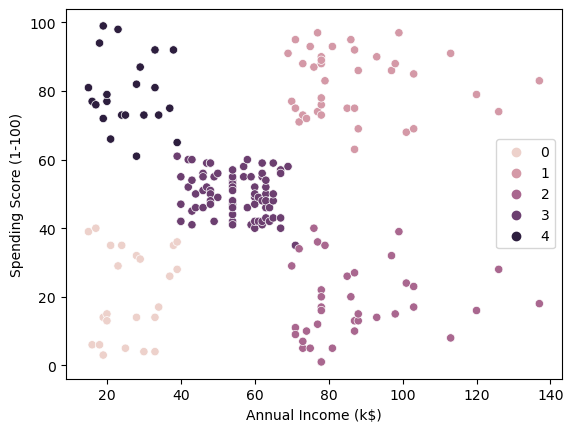

In [30]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=kmeans.labels_,data=Kmean_data)

## Hierarchical Clustering

Text(0, 0.5, 'Euclidean distances')

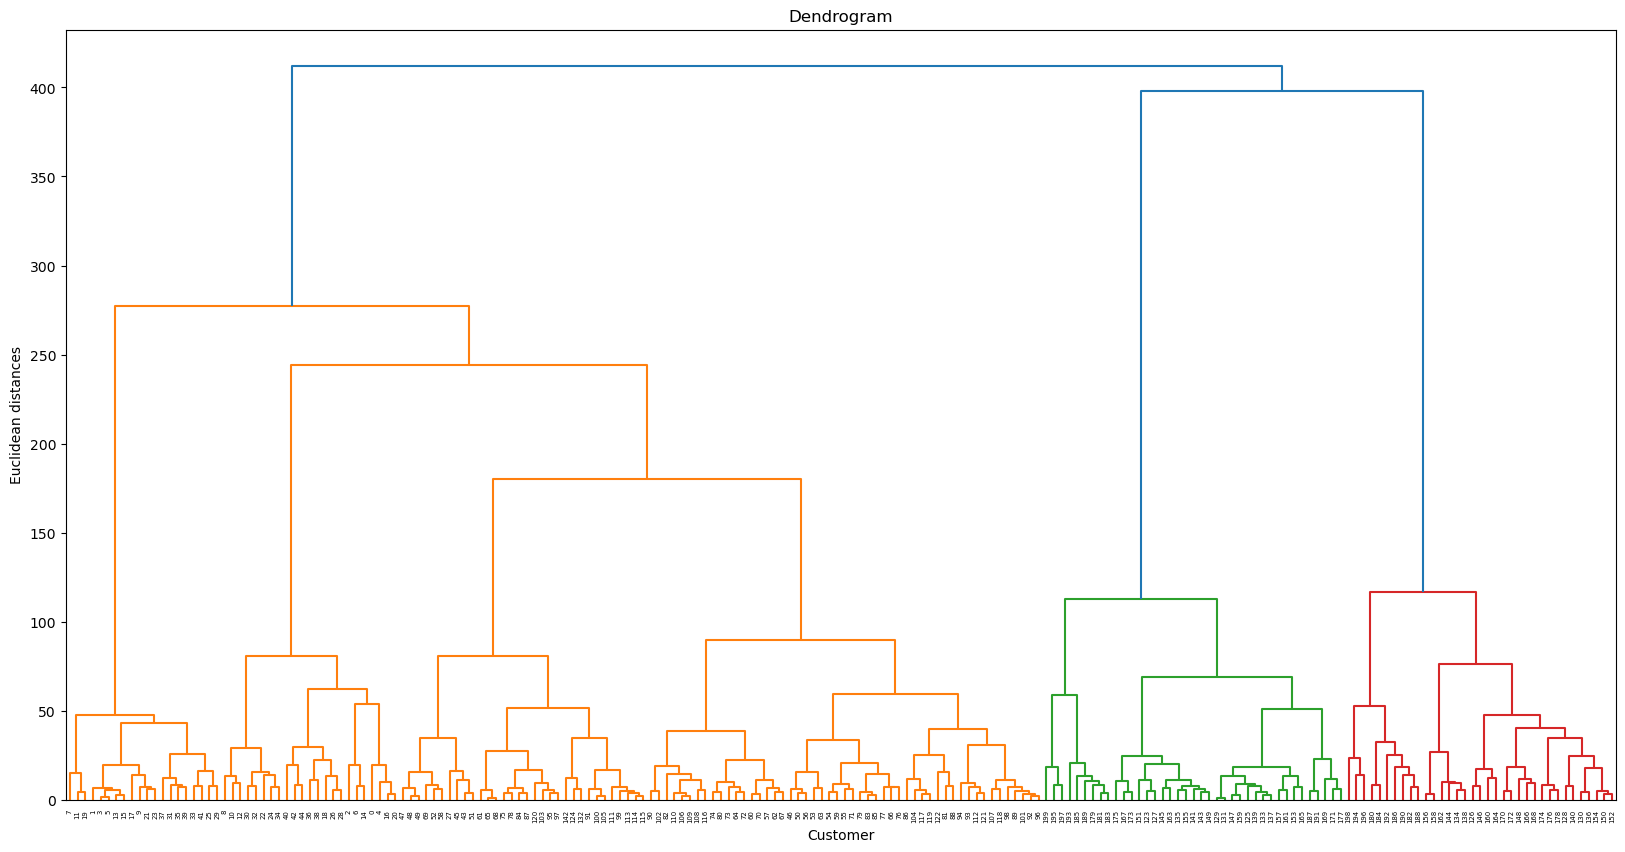

In [31]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidean distances")

In [32]:
Agglomerative_Clustering=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [33]:
Agglomerative_Clustering.fit(X)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [34]:
yac = Agglomerative_Clustering.fit_predict(X)
yac

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [35]:
AgglomerativeClustering_data = data.copy()
AgglomerativeClustering_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [36]:
AgglomerativeClustering_data['Claster']=yac
AgglomerativeClustering_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Claster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,1
197,Male,32,126,74,2
198,Male,32,137,18,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

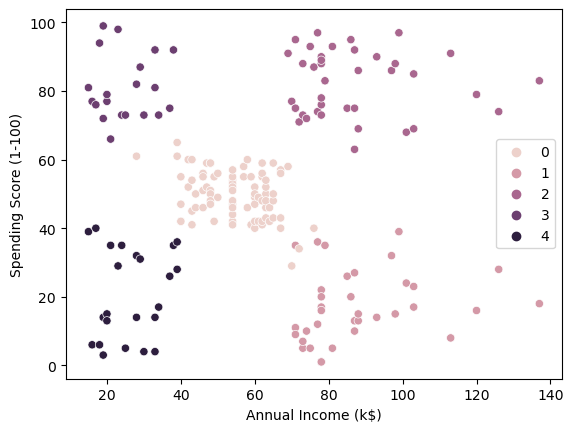

In [37]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=Agglomerative_Clustering.labels_,data=AgglomerativeClustering_data)